In [66]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("techwar.csv", on_bad_lines="skip")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [67]:
df.shape


(24, 1)

In [68]:
df = pd.read_csv("support_data.csv")
df.head()

,Ticket_Id,Created_Date,Region,City,Issue_Category,Priority,Resolution_Time_Hours,Customer_Type,Satisfaction_Score
0,500000,2022-07-27,NaN,Pune,Billing,Medium,36,Existing,5
1,500001,2024-04-04,NaN,Chennai,NaN,Medium,10,Existing,2
2,500002,2024-02-12,Central,Ahmedabad,Network,High,41,New,2
3,500003,2022-02-18,Central,Bengaluru,Service,Low,206,New,4
4,500004,2023-01-04,Central,Chennai,Hardware,Critical,31,Existing,5


In [69]:
df = pd.read_csv("support_data.csv")
df.tail()

,Ticket_Id,Created_Date,Region,City,Issue_Category,Priority,Resolution_Time_Hours,Customer_Type,Satisfaction_Score
4,500004,2023-01-04,Central,Chennai,Hardware,Critical,31,Existing,5
5,500005,2022-05-01,West,Ahmedabad,Billing,Low,175,New,4
6,500006,2023-02-24,NaN,Kolkata,Billing,Low,17,Existing,3
7,500007,2023-12-02,North,Mumbai,NaN,Medium,87,Existing,3
8,500008,2023-09-03,NaN,Kolkata,Network,High,223,New,3


In [71]:
df = pd.read_csv("support_data.csv") 
print(df.isnull().sum())

Ticket_Id                0
Created_Date             0
Region                   4
City                     0
Issue_Category           2
Priority                 0
Resolution_Time_Hours    0
Customer_Type            0
Satisfaction_Score       0
dtype: int64


In [72]:
df = pd.read_csv("support_data.csv") 
print(df.dtypes)

Ticket_Id                 int64
Created_Date             object
Region                   object
City                     object
Issue_Category           object
Priority                 object
Resolution_Time_Hours     int64
Customer_Type            object
Satisfaction_Score        int64
dtype: object


In [73]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
print(df[duplicates])

df = df.drop_duplicates()
print("Duplicates removed, new shape:", df.shape)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Ticket_Id, Created_Date, Region, City, Issue_Category, Priority, Resolution_Time_Hours, Customer_Type, Satisfaction_Score]
Index: []
Duplicates removed, new shape: (9, 9)


In [27]:

df.describe()

,Resolution_Time_Hours,Satisfaction_Score
count,9.000000,9.000000
mean,91.777778,3.444444
std,85.788662,1.130388
min,10.000000,2.000000
25%,31.000000,3.000000
50%,41.000000,3.000000
75%,175.000000,4.000000
max,223.000000,5.000000


In [28]:
print("Issue Category Distribution:")
print(df['Issue_Category'].value_counts())

print("\nPriority Distribution:")
print(df['Priority'].value_counts())

print("\nRegion Distribution:")
print(df['Region'].value_counts())

print("\nCustomer Type Distribution:")
print(df['Customer_Type'].value_counts())


Issue Category Distribution:
Issue_Category
Billing     3
Network     2
Service     1
Hardware    1
Name: count, dtype: int64

Priority Distribution:
Priority
Medium      3
Low         3
High        2
Critical    1
Name: count, dtype: int64

Region Distribution:
Region
Central    3
West       1
North      1
Name: count, dtype: int64

Customer Type Distribution:
Customer_Type
Existing    5
New         4
Name: count, dtype: int64


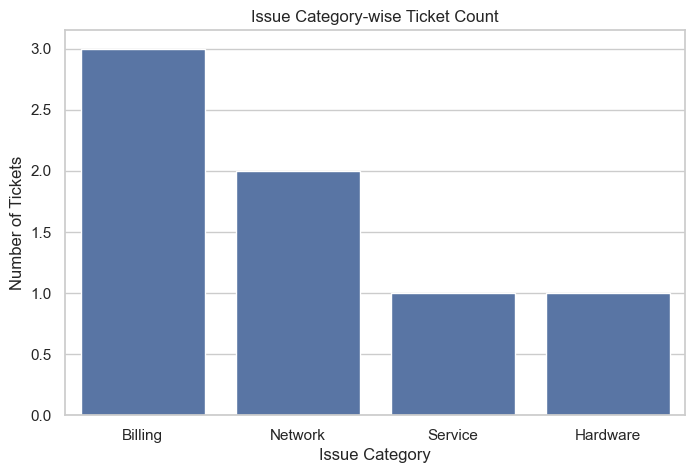

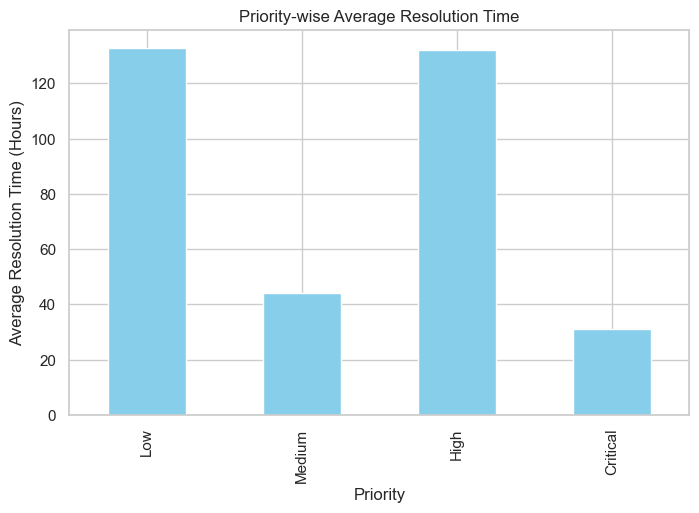

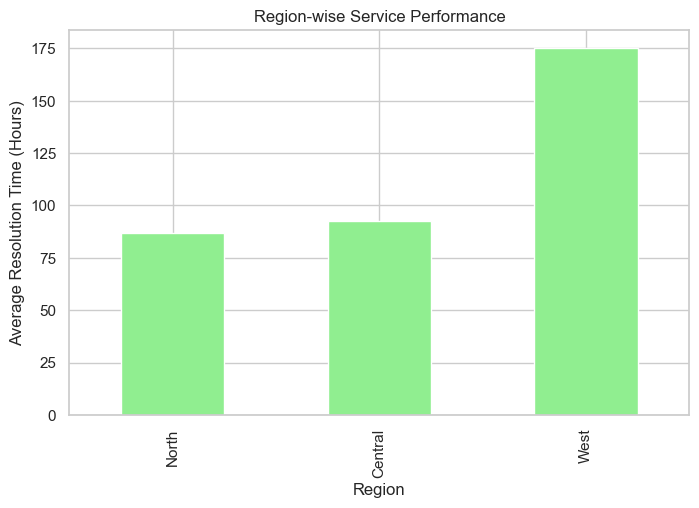

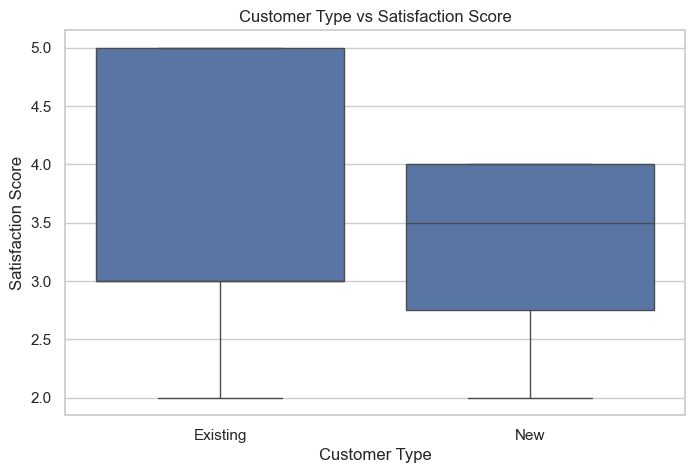

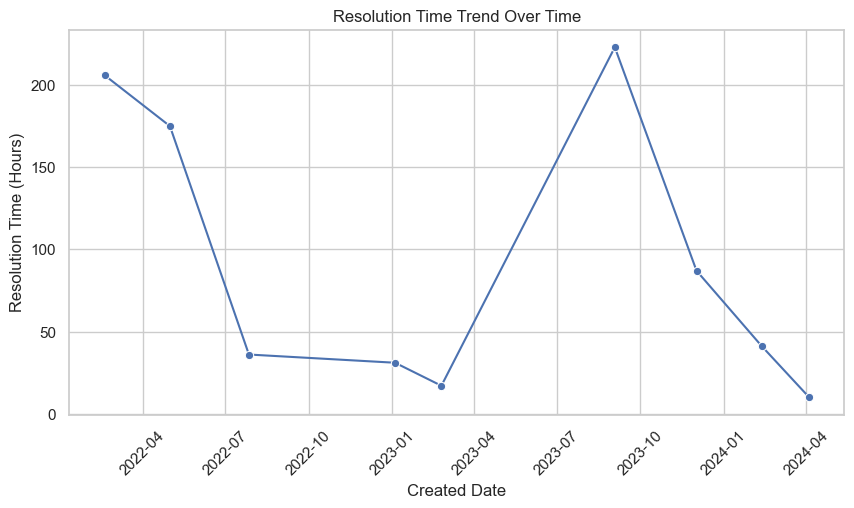

In [75]:

df = pd.read_csv("support_data.csv")
df['Created_Date'] = pd.to_datetime(df['Created_Date'])

plt.figure(figsize=(8,5))
sns.countplot(x='Issue_Category', data=df, order=df['Issue_Category'].value_counts().index)
plt.title("Issue Category-wise Ticket Count")
plt.xlabel("Issue Category")
plt.ylabel("Number of Tickets")
plt.show()

priority_avg = df.groupby('Priority')['Resolution_Time_Hours'].mean().reindex(['Low','Medium','High','Critical'])
plt.figure(figsize=(8,5))
priority_avg.plot(kind='bar', color='skyblue')
plt.title("Priority-wise Average Resolution Time")
plt.xlabel("Priority")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()

region_avg = df.groupby('Region')['Resolution_Time_Hours'].mean().sort_values()
plt.figure(figsize=(8,5))
region_avg.plot(kind='bar', color='lightgreen')
plt.title("Region-wise Service Performance")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Customer_Type', y='Satisfaction_Score', data=df)
plt.title("Customer Type vs Satisfaction Score")
plt.xlabel("Customer Type")
plt.ylabel("Satisfaction Score")
plt.show()

plt.figure(figsize=(10,5))
df_sorted = df.sort_values('Created_Date')
sns.lineplot(x='Created_Date', y='Resolution_Time_Hours', data=df_sorted, marker='o')
plt.title("Resolution Time Trend Over Time")
plt.xlabel("Created Date")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.show()


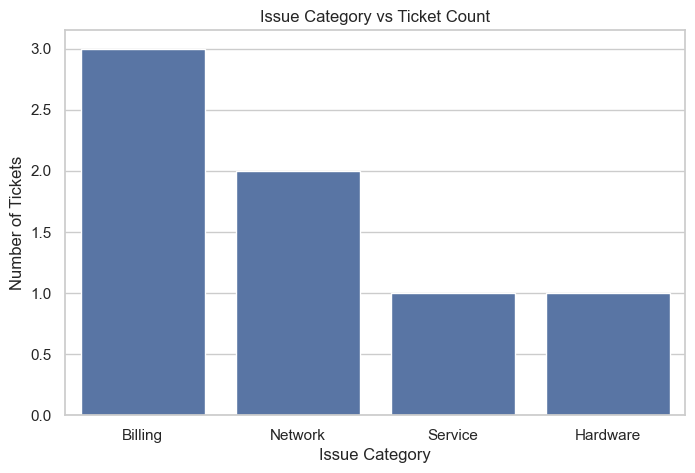

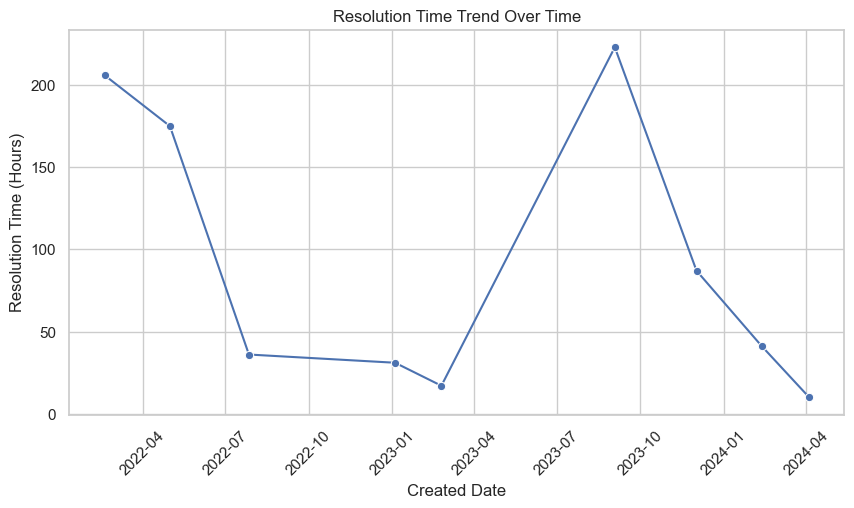

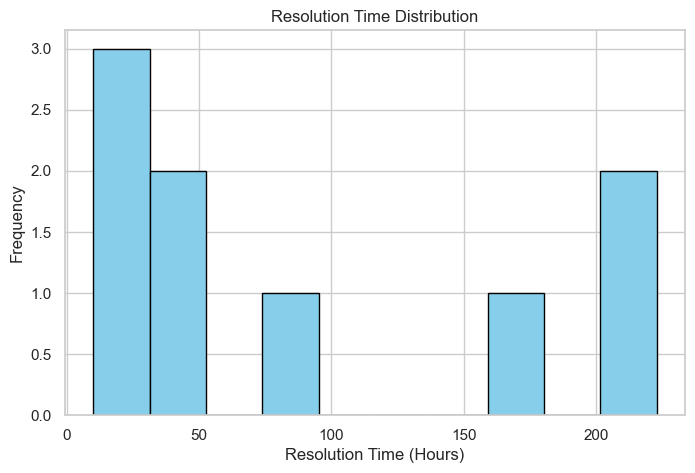

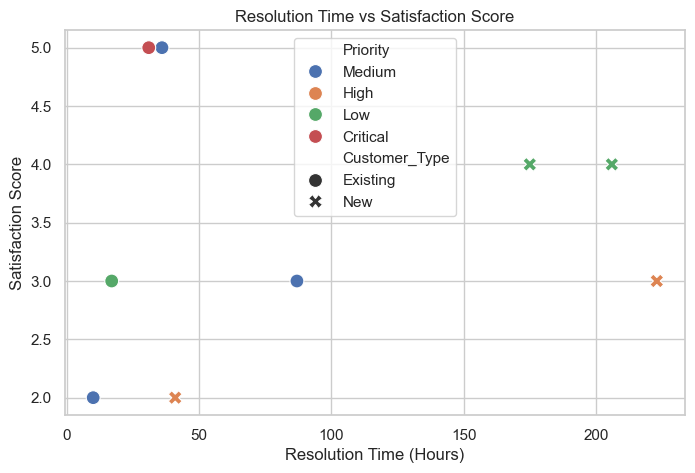

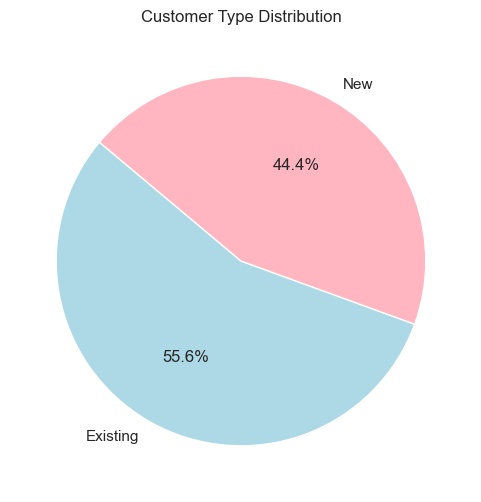

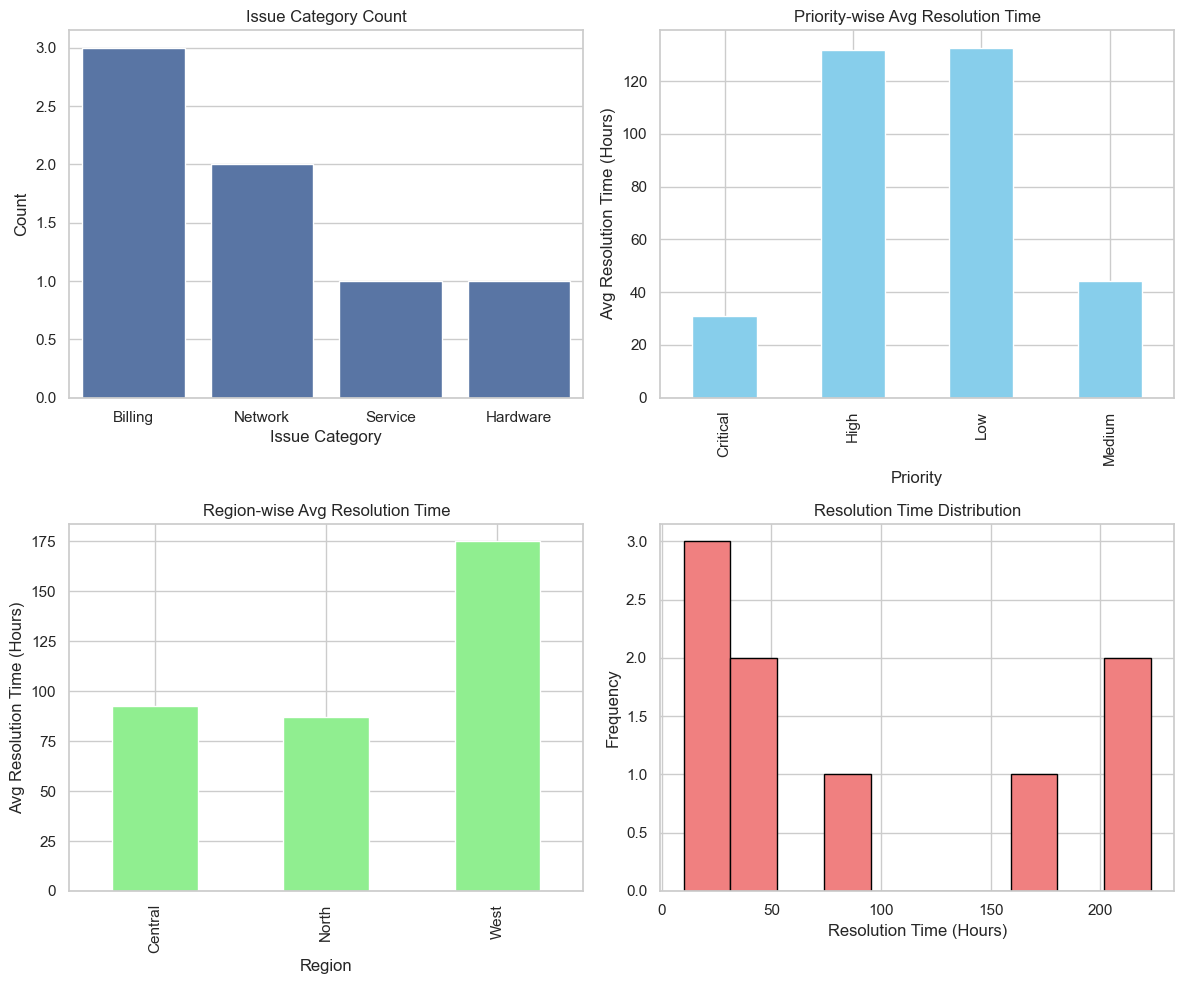

In [83]:

df = pd.read_csv("support_data.csv")
df['Created_Date'] = pd.to_datetime(df['Created_Date'])

plt.figure(figsize=(8,5))
sns.countplot(x='Issue_Category', data=df, order=df['Issue_Category'].value_counts().index)
plt.title("Issue Category vs Ticket Count")
plt.xlabel("Issue Category")
plt.ylabel("Number of Tickets")
plt.show()

plt.figure(figsize=(10,5))
df_sorted = df.sort_values('Created_Date')
sns.lineplot(x='Created_Date', y='Resolution_Time_Hours', data=df_sorted, marker='o')
plt.title("Resolution Time Trend Over Time")
plt.xlabel("Created Date")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df['Resolution_Time_Hours'], bins=10, color='skyblue', edgecolor='black')
plt.title("Resolution Time Distribution")
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Resolution_Time_Hours', y='Satisfaction_Score', data=df, hue='Priority', style='Customer_Type', s=100)
plt.title("Resolution Time vs Satisfaction Score")
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Satisfaction Score")
plt.show()

customer_counts = df['Customer_Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','lightpink'])
plt.title("Customer Type Distribution")
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.countplot(x='Issue_Category', data=df, order=df['Issue_Category'].value_counts().index, ax=axes[0,0])
axes[0,0].set_title("Issue Category Count")
axes[0,0].set_xlabel("Issue Category")
axes[0,0].set_ylabel("Count")

priority_avg = df.groupby('Priority')['Resolution_Time_Hours'].mean()
priority_avg.plot(kind='bar', color='skyblue', ax=axes[0,1])
axes[0,1].set_title("Priority-wise Avg Resolution Time")
axes[0,1].set_xlabel("Priority")
axes[0,1].set_ylabel("Avg Resolution Time (Hours)")

region_avg = df.groupby('Region')['Resolution_Time_Hours'].mean()
region_avg.plot(kind='bar', color='lightgreen', ax=axes[1,0])
axes[1,0].set_title("Region-wise Avg Resolution Time")
axes[1,0].set_xlabel("Region")
axes[1,0].set_ylabel("Avg Resolution Time (Hours)")

axes[1,1].hist(df['Resolution_Time_Hours'], bins=10, color='lightcoral', edgecolor='black')
axes[1,1].set_title("Resolution Time Distribution")
axes[1,1].set_xlabel("Resolution Time (Hours)")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [79]:

print(df.describe())

           Ticket_Id         Created_Date  Resolution_Time_Hours  \
count       9.000000                    9               9.000000   
mean   500004.000000  2023-03-29 00:00:00              91.777778   
min    500000.000000  2022-02-18 00:00:00              10.000000   
25%    500002.000000  2022-07-27 00:00:00              31.000000   
50%    500004.000000  2023-02-24 00:00:00              41.000000   
75%    500006.000000  2023-12-02 00:00:00             175.000000   
max    500008.000000  2024-04-04 00:00:00             223.000000   
std         2.738613                  NaN              85.788662   

       Satisfaction_Score  
count            9.000000  
mean             3.444444  
min              2.000000  
25%              3.000000  
50%              3.000000  
75%              4.000000  
max              5.000000  
std              1.130388  


In [82]:

high_priority_count = df[df['Priority'].isin(['High', 'Critical'])].shape[0]
print(f"High-Priority Tickets: {high_priority_count}")

region_perf = df.groupby('Region')['Resolution_Time_Hours'].mean().sort_values()
print("\nRegion-wise Average Resolution Time:")
print(region_perf)

top_issues = df['Issue_Category'].value_counts().head()
print("\nTop 5 Frequent Issue Categories:")
print(top_issues)

low_satisfaction = df[df['Satisfaction_Score'] <= 2]
print("\nTickets with Low Satisfaction Scores:")
print(low_satisfaction[['Ticket_Id','Customer_Type','Issue_Category','Resolution_Time_Hours','Satisfaction_Score']])


High-Priority Tickets: 3

Region-wise Average Resolution Time:
Region
North       87.000000
Central     92.666667
West       175.000000
Name: Resolution_Time_Hours, dtype: float64

Top 5 Frequent Issue Categories:
Issue_Category
Billing     3
Network     2
Service     1
Hardware    1
Name: count, dtype: int64

Tickets with Low Satisfaction Scores:
   Ticket_Id Customer_Type Issue_Category  Resolution_Time_Hours  \
1     500001      Existing            NaN                     10   
2     500002           New        Network                     41   

   Satisfaction_Score  
1                   2  
2                   2  
